In [6]:
! pip install lifelines scikit-survival survshap shap jinja2 survinsights seaborn numba numpy==1.23.5 


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 5.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "/usr/local/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 389, in <module>
          main()
        File "/usr/local/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 373, in main
          json_out["return_val"] = hook(**hook_input["kwargs"])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/usr/local/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 137, in get_requires_for_build_wheel
          backend = _build_backend()
                    ^^^^^^^^^^^^

In [8]:
pip install scikit-learn shap

  Using cached shap-0.47.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (25 kB)
  Using cached numba-0.61.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 9.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 3.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [shap]3/4 [shap]]te]
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install scikit-survival

  Using cached scikit_survival-0.24.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (48 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [scikit-survival] [scikit-survival]
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install survshap

  Using cached survshap-0.4.2-py3-none-any.whl.metadata (3.3 kB)
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install lifelines

  Using cached lifelines-0.30.0-py3-none-any.whl.metadata (3.2 kB)
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'autograd-gamma' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'autograd-gamma'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4120 sha256=d002484f94567db80973d058ca5a6fb1b896278100051959e0ad13140b9ce440
  Stored in directory: /home/onyxia/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [lifelines]/5 [lifelines]
Note: you may need to restart the

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sksurv.util import Surv
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import integrated_brier_score
from sksurv.metrics import concordance_index_censored

from lifelines import CoxPHFitter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import fonctions_SurvTreeShap as fstp

from survshap import SurvivalModelExplainer, PredictSurvSHAP

/usr/local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
import importlib
importlib.reload(fstp)

<module 'fonctions_SurvTreeShap' from '/home/onyxia/work/Surv-ML/fonctions_SurvTreeShap.py'>

In [20]:
np.random.seed(36)

n = 10000

# X1 : effet réel
X1 = np.random.normal(size=n)

# X2 : fortement corrélée à X1 mais sans effet
X2 = 0.5 * X1 + np.random.normal(scale=0.1, size=n)

# X3 : effet modéré positif
X3 = np.random.normal(size=n)

# X4 : effet faible négatif
X4 = np.random.normal(size=n)

# X5 : aucun effet
X5 = np.random.normal(size=n)

# Coefficients simulés
beta1 = 20   # X1
beta2 = 0.0   # X2
beta3 = 15   # X3
beta4 = -12  # X4
beta5 = 8   # X5

# Prédicteur linéaire pour générer les taux
linpred = beta1 * X1 + beta3 * X3 + beta4 * X4
lambda_ = np.exp(linpred)

# Temps de survie simulés (distribution exponentielle)
T = np.random.exponential(scale=1/lambda_)

# Temps de censure aléatoire
C = np.random.exponential(scale=10, size=n)

# Temps observés et indicateur de censure
observed_time = np.minimum(T, C)
event_observed = (T <= C).astype(int)

# Création du DataFrame
df = pd.DataFrame({
    'time': observed_time,
    'event': event_observed,
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'X4': X4,
    'X5': X5
})

In [21]:
print(df.head())

           time  event        X1        X2        X3        X4        X5
0  3.237042e-04      1  0.676413  0.375692 -0.204092  0.348241  0.544973
1  2.511637e+01      0  1.521099  0.871730 -1.389283  1.215616  0.820599
2  5.595122e-16      1 -0.511876 -0.032647  1.372677 -2.164650  0.385178
3  2.277437e-05      1  1.150195  0.658470 -1.425445 -0.827347  0.781083
4  1.004366e+01      0 -0.590717 -0.388347 -0.605587 -0.320603  2.248140


In [22]:
Xe = df[['X1', 'X2', 'X3', 'X4', 'X5']].copy()
ye = df[['event', 'time']].copy()
X_train, X_test, y_train, y_test = train_test_split(Xe, ye, test_size=0.2, random_state=42)

In [23]:
y_train_RSF = Surv.from_dataframe("event", "time", y_train)
y_test_RSF = Surv.from_dataframe("event", "time", y_test)

In [24]:
rsf2 = RandomSurvivalForest(n_estimators=100, random_state=42, max_depth=3)
rsf2.fit(X_train, y_train_RSF)

RandomSurvivalForest(max_depth=3, random_state=42)

100%|██████████| 8000/8000 [00:50<00:00, 158.60it/s]


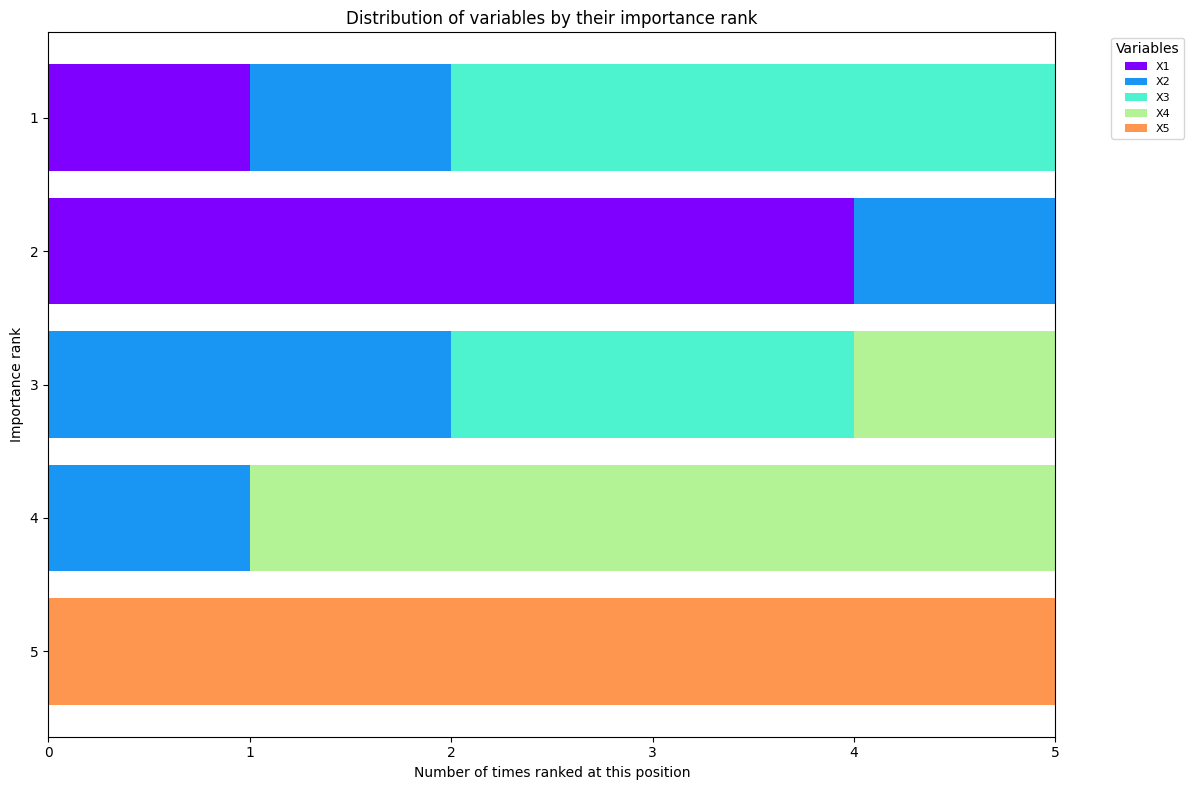

In [25]:
STS=fstp.SurvTreeSHAPexplainer(rsf2, X_test)
STS.rankvariables(5)


100%|██████████| 8000/8000 [00:55<00:00, 143.03it/s]


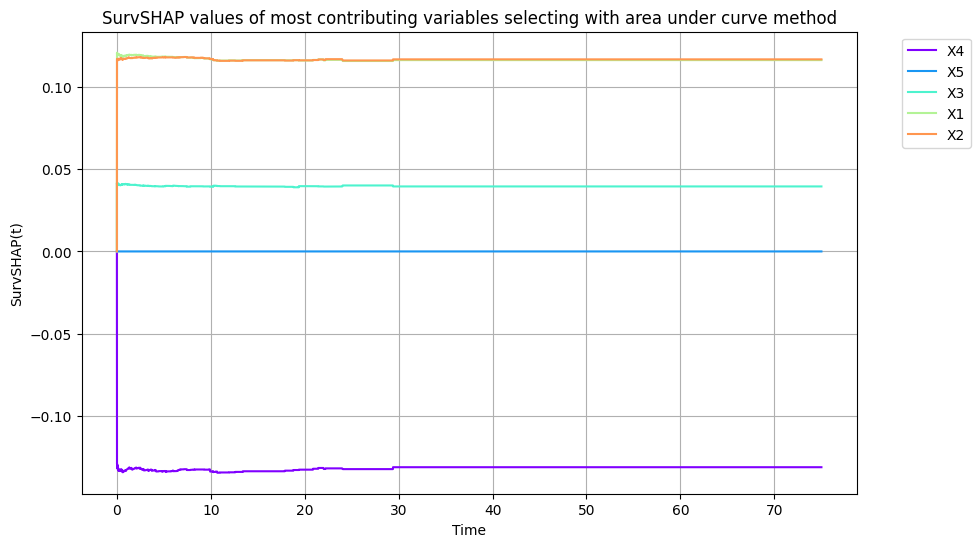

In [26]:
STS.plotgraph(6, "area", 0, 5)

In [27]:

np.random.seed(42)
n = 1000

# Covariables
X = pd.DataFrame({
    'age': np.random.normal(50, 10, size=n),
    'sex': np.random.choice([0, 1], size=n),
    'smoking': np.random.choice([0, 1], size=n),
    'cholesterol': np.random.normal(200, 50, size=n),
    'blood_pressure': np.random.normal(120, 15, size=n),
    'diabetes': np.random.choice([0, 1], size=n),
    'exercise': np.random.choice([0, 1], size=n),
    'alcohol': np.random.choice([0, 1], size=n),
    'weight': np.random.normal(70, 10, size=n),
    'height': np.random.normal(170, 10, size=n)
})

# Coefficients de base
beta_static = np.array([-0.03, 0.2, 0.0, 0.01, -0.005, 0.3, 0.0, 0.05, -0.01, 0.005])

# Grille temporelle
t_grid = np.linspace(0.1, 100, 1000)
dt = t_grid[1] - t_grid[0]

# Risque de base plus faible
baseline_hazard = 0.0005
survival_time = np.zeros(n)

for i in range(n):
    x_i = X.iloc[i].values

    # Effets non proportionnels plus doux
    beta_smoking_t = 0.02 + 0.05 * t_grid
    beta_exercise_t = -0.03 - 0.05 * t_grid

    static_effect = np.dot(x_i, beta_static)
    lp_t = static_effect + beta_smoking_t * x_i[2] + beta_exercise_t * x_i[6]

    hazard = baseline_hazard * np.exp(lp_t)
    cum_hazard = np.cumsum(hazard) * dt
    S = np.exp(-cum_hazard)

    # Simulation d’un temps de survie basé sur S(t)
    u = np.random.uniform()
    idx = np.searchsorted(S[::-1], u)
    idx = len(t_grid) - idx - 1
    idx = np.clip(idx, 0, len(t_grid) - 1)
    survival_time[i] = t_grid[idx]

# Censure aléatoire
censoring_time = np.random.uniform(0, 100, size=n)
event_observed = survival_time <= censoring_time
observed_time = np.minimum(survival_time, censoring_time)

# Format pour scikit-survival
y = Surv.from_arrays(event_observed, observed_time)

# DataFrame résumé
y_df = pd.DataFrame({
    "event": event_observed.astype(int),
    "time": observed_time
})

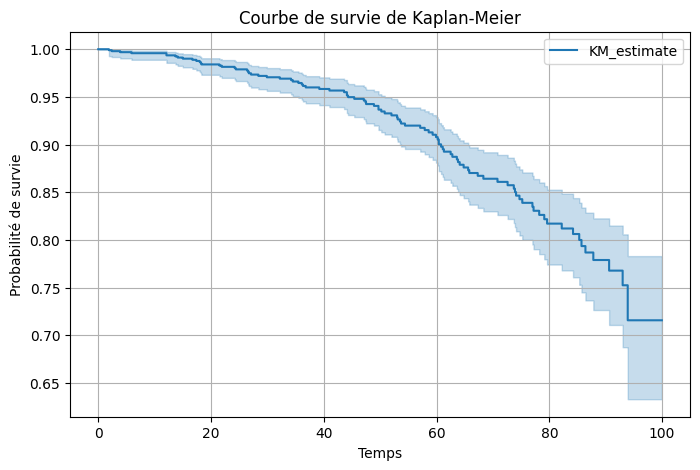

In [28]:
from lifelines import KaplanMeierFitter

# Initialiser l'objet Kaplan-Meier
kmf = KaplanMeierFitter()

# Ajuster le modèle aux données simulées
kmf.fit(durations=y_df["time"], event_observed=y_df["event"])

# Tracer la courbe de survie
plt.figure(figsize=(8, 5))
kmf.plot(ci_show=True)
plt.title("Courbe de survie de Kaplan-Meier")
plt.xlabel("Temps")
plt.ylabel("Probabilité de survie")
plt.grid(True)
plt.show()

In [29]:
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index

data_full = pd.concat([X, y_df], axis=1)

# 1. Créer le CoxPHFitter
cph = CoxPHFitter()

# 2. Ajuster le modèle sur les données
cph.fit(data_full, duration_col='time', event_col='event')

# 3. Afficher le résumé des coefficients
cph.print_summary()

# 4. Calcul du C-index (valeurs proches de 1 = très bon modèle)
c_index = concordance_index(data_full['time'], -cph.predict_partial_hazard(data_full), data_full['event'])

print(f"\nC-index (modèle de Cox) : {c_index:.3f}")


<lifelines.CoxPHFitter: fitted with 1000 total observations, 905 right-censored observations>
             duration col = 'time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 95
   partial log-likelihood = -476.21
         time fit was run = 2025-05-14 12:18:01 UTC

---
                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                       
age            -0.03      0.97      0.01           -0.05           -0.01                0.95                0.99
sex             0.14      1.16      0.21           -0.27            0.56                0.77                1.74
smoking         2.10      8.21      0.29            1.54            2.67                4.66               14.45
cholesterol     0.01      1.01      0.00            0.01            0.02                1.01                1.02
blood_pressure -0.01      0.99      0.01           -0.02            0.01                0.98                1.01
diabetes        0.45      1.57      0.21            0.03            0.87                1.04                2.39
exercise       -2.47      0.08      0.32           -3.10           -1.84                0.05                0.16
alcohol        -0.09      0.91      0.21           -0.50            0.32                0.60                1.37
weight          0.01      1.01      0.01           -0.01            0.03                0.99                1.03
height          0.01      1.01      0.01           -0.02            0.03                0.98                1.03

                cmp to     z      p  -log2(p)
covariate                                    
age               0.00 -2.59   0.01      6.69
sex               0.00  0.69   0.49      1.03
smoking           0.00  7.29 <0.005     41.58
cholesterol       0.00  5.47 <0.005     24.44
blood_pressure    0.00 -0.96   0.34      1.56
diabetes          0.00  2.12   0.03      4.88
exercise          0.00 -7.74 <0.005     46.49
alcohol           0.00 -0.44   0.66      0.61
weight            0.00  0.87   0.38      1.38
height            0.00  0.53   0.59      0.75
---
Concordance = 0.80
Partial AIC = 972.43
log-likelihood ratio test = 182.96 on 10 df
-log2(p) of ll-ratio test = 110.44


C-index (modèle de Cox) : 0.803


<Axes: xlabel='log(HR) (95% CI)'>

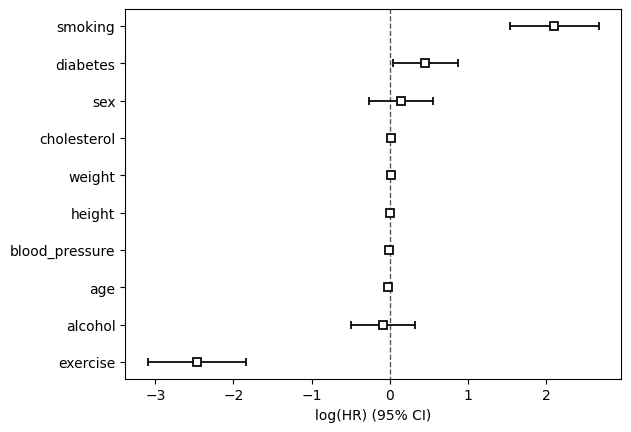

In [30]:
cph.plot()

In [31]:
Xc = X
yc = y_df
X_train, X_test, y_train, y_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)


In [32]:
y_train_RSF = Surv.from_dataframe("event", "time", y_train)
y_test_RSF = Surv.from_dataframe("event", "time", y_test)

In [33]:
rsf = RandomSurvivalForest(n_estimators=100, random_state=42, max_depth=3)
rsf.fit(X_train, y_train_RSF)

RandomSurvivalForest(max_depth=3, random_state=42)

In [34]:
y_pred_rsf = rsf.predict(X_test)
c_index = concordance_index_censored(y_test_RSF["event"], y_test_RSF["time"], y_pred_rsf)[0]
c_index

np.float64(0.6801152737752162)

In [35]:
X_test

,age,sex,smoking,cholesterol,blood_pressure,diabetes,exercise,alcohol,weight,height
521,55.433602,1,1,190.840169,125.424916,1,1,0,74.283421,155.930225
737,59.826910,1,1,184.323516,144.437495,0,1,0,63.961411,156.003185
740,31.591258,1,0,221.004725,117.030934,1,1,0,79.737262,165.865762
660,44.263380,0,0,214.711206,118.327368,0,1,1,73.278111,173.735337
411,38.753579,1,0,200.957389,91.752747,1,0,1,47.505675,170.645060
...,...,...,...,...,...,...,...,...,...,...
408,51.202956,1,1,209.485308,96.974396,1,0,0,74.316316,168.283263
332,50.758046,1,1,71.883317,135.730607,0,0,1,76.963229,166.532284
208,55.150477,1,1,217.572410,105.721223,1,0,0,75.496832,173.374821
613,38.745110,1,1,203.467217,113.934039,1,1,1,70.156822,152.069236


100%|██████████| 796/796 [00:05<00:00, 155.01it/s]


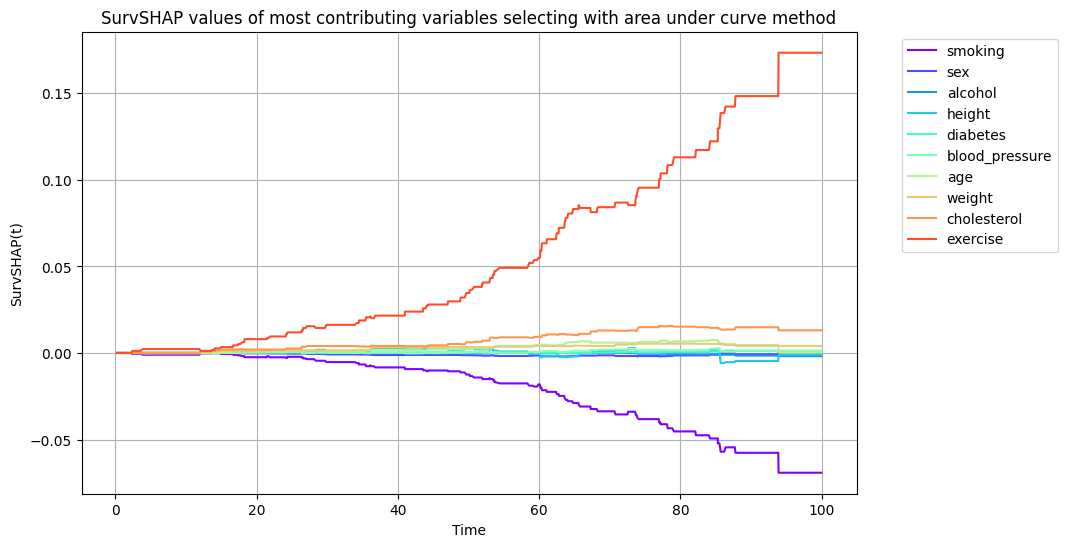

In [36]:
STS=fstp.SurvTreeSHAPexplainer(rsf, X_test)
STS.plotgraph(1, "area", 0, 10)


100%|██████████| 796/796 [00:04<00:00, 160.28it/s]


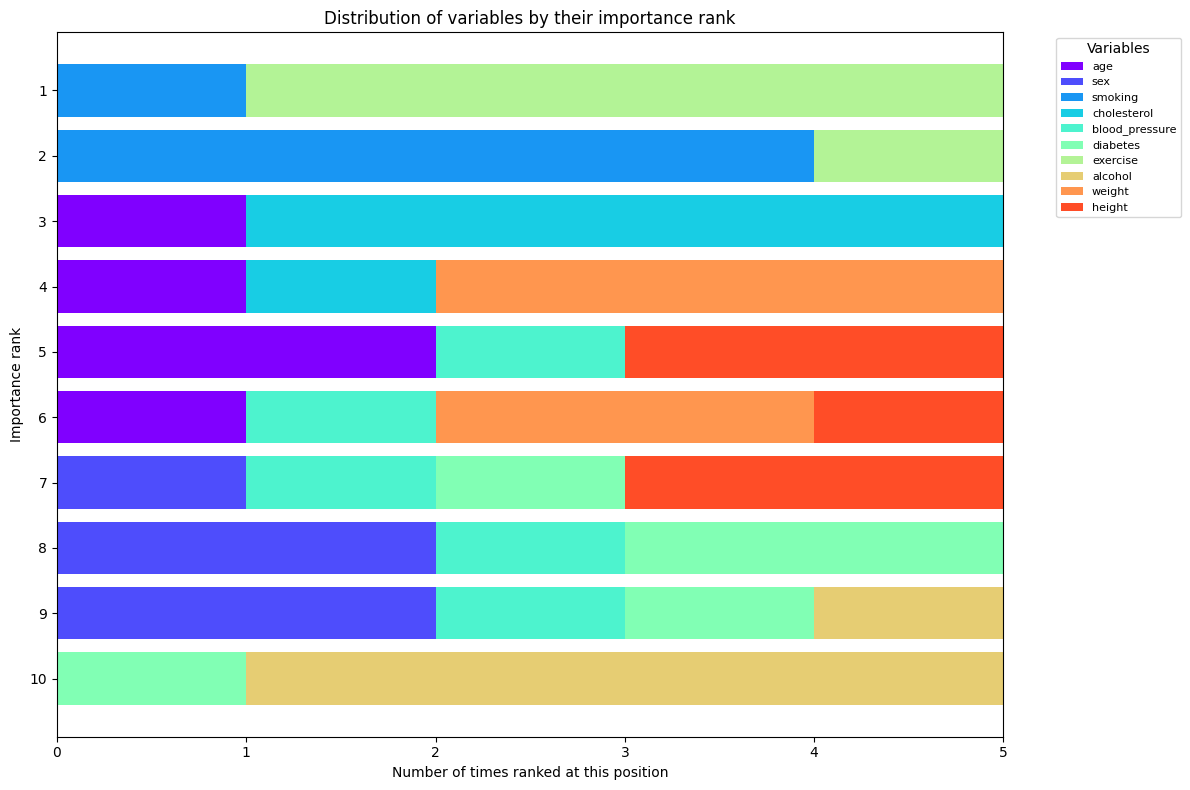

In [37]:
STS.rankvariables(5)

In [38]:
import numpy as np
import pandas as pd
from sksurv.util import Surv

np.random.seed(42)
n = 1000

# Covariables
X = pd.DataFrame({
    'age': np.random.normal(50, 10, size=n),
    'sex': np.random.choice([0, 1], size=n),
    'smoking': np.random.choice([0, 1], size=n),
    'cholesterol': np.random.normal(200, 50, size=n),
    'blood_pressure': np.random.normal(120, 15, size=n),
    'diabetes': np.random.choice([0, 1], size=n),
    'exercise': np.random.choice([0, 1], size=n),
    'alcohol': np.random.choice([0, 1], size=n),
    'weight': np.random.normal(70, 10, size=n),
    'height': np.random.normal(170, 10, size=n)
})

# Coefficients de base (effets proportionnels)
beta_static = np.array([-0.03, 0.2, 0.0, 0.01, -0.005, 0.3, 0.0, 0.05, -0.01, 0.005])

# Grille temporelle
t_grid = np.linspace(0.1, 100, 1000)
dt = t_grid[1] - t_grid[0]

# Risque de base
baseline_hazard = 0.0005
survival_time = np.zeros(n)

for i in range(n):
    x_i = X.iloc[i].values

    beta_smoking_t = 0.02 + 0.001 * t_grid
    beta_exercise_t = 3 * np.cos(t_grid / 10)

    static_effect = np.dot(x_i, beta_static)
    lp_t = static_effect + beta_smoking_t * x_i[2] + beta_exercise_t * x_i[6]

    hazard = baseline_hazard * np.exp(lp_t)
    cum_hazard = np.cumsum(hazard) * dt
    S = np.exp(-cum_hazard)

    # Inversion de S(t) pour trouver le temps simulé
    u = np.random.uniform()
    idx = np.searchsorted(S[::-1], u)
    idx = len(t_grid) - idx - 1
    idx = np.clip(idx, 0, len(t_grid) - 1)
    survival_time[i] = t_grid[idx]

# Censure aléatoire
censoring_time = np.random.uniform(0, 100, size=n)
event_observed = survival_time <= censoring_time
observed_time = np.minimum(survival_time, censoring_time)

# Format pour scikit-survival
y = Surv.from_arrays(event_observed, observed_time)

# DataFrame final
y_df = pd.DataFrame({
    "event": event_observed.astype(int),
    "time": observed_time
})

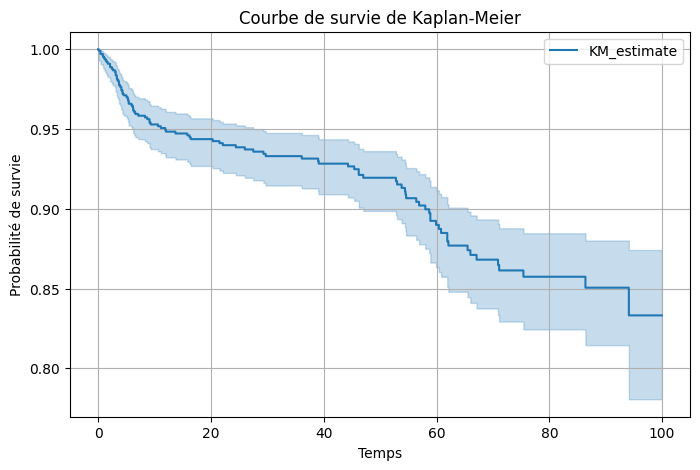

In [39]:
from lifelines import KaplanMeierFitter

# Initialiser l'objet Kaplan-Meier
kmf = KaplanMeierFitter()

# Ajuster le modèle aux données simulées
kmf.fit(durations=y_df["time"], event_observed=y_df["event"])

# Tracer la courbe de survie
plt.figure(figsize=(8, 5))
kmf.plot(ci_show=True)
plt.title("Courbe de survie de Kaplan-Meier")
plt.xlabel("Temps")
plt.ylabel("Probabilité de survie")
plt.grid(True)
plt.show()

In [40]:
Xc = X
yc = y_df
X_train, X_test, y_train, y_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)

In [41]:
y_train_RSF = Surv.from_dataframe("event", "time", y_train)
y_test_RSF = Surv.from_dataframe("event", "time", y_test)

In [42]:
rsf = RandomSurvivalForest(n_estimators=100, random_state=42, max_depth=3)
rsf.fit(X_train, y_train_RSF)

RandomSurvivalForest(max_depth=3, random_state=42)

100%|██████████| 792/792 [00:05<00:00, 148.36it/s]


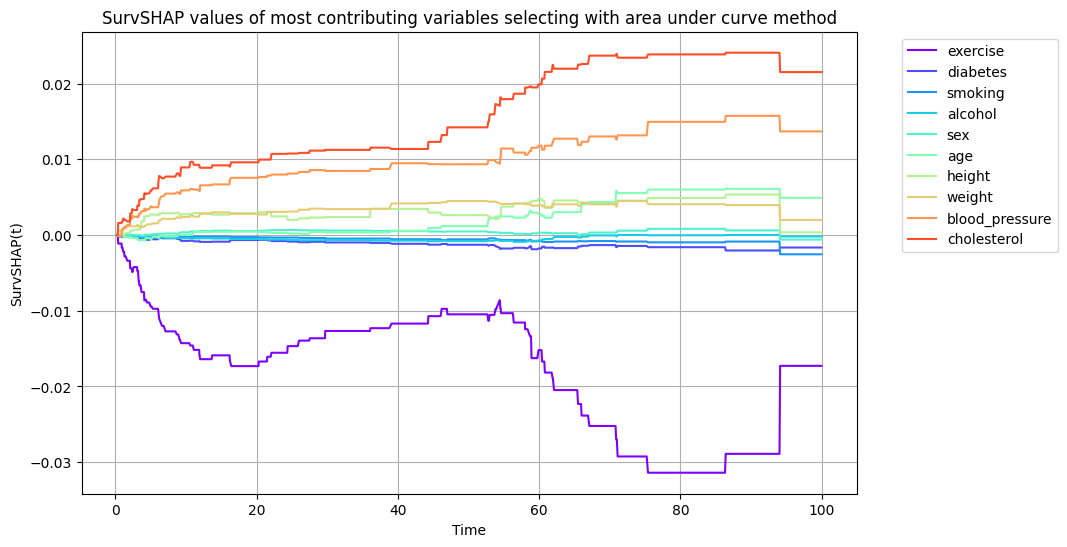

In [43]:
STS=fstp.SurvTreeSHAPexplainer(rsf, X_test)
STS.plotgraph(0, "area", 0,10)

100%|██████████| 792/792 [00:04<00:00, 169.57it/s]
/home/onyxia/work/Surv-ML/fonctions_SurvTreeShap.py:162: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


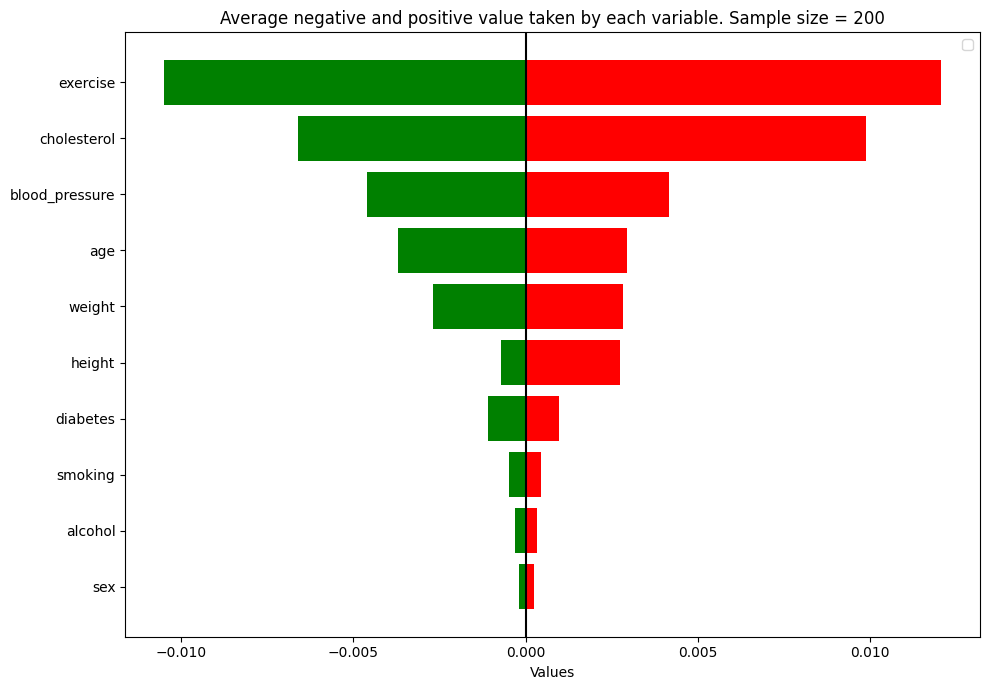

(Index(['age', 'sex', 'smoking', 'cholesterol', 'blood_pressure', 'diabetes',
        'exercise', 'alcohol', 'weight', 'height'],
       dtype='object'),
 array([-0.73757176, -0.04050118, -0.09470091, -1.31925082, -0.92027292,
        -0.21858063, -2.09784373, -0.06133668, -0.53462265, -0.14071331]),
 array([0.58614029, 0.0482501 , 0.09145992, 1.9763065 , 0.83344034,
        0.19248464, 2.41130218, 0.06758139, 0.56345791, 0.54718787]))

In [44]:
STS.averagesurvshap(None, None, True, True)

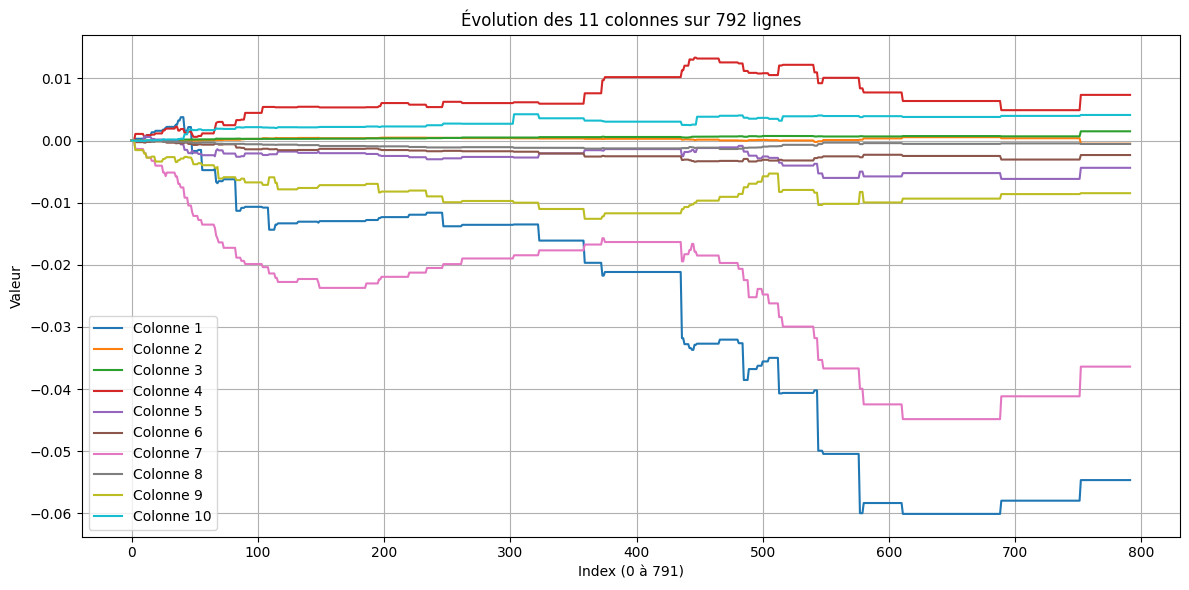

In [50]:
data = STS.computesurvshap(2)

plt.figure(figsize=(12, 6))

for i in range(data.shape[1] - 1):  # Boucle sur les 11 colonnes
    plt.plot(data[:, i], label=f'Colonne {i+1}')

plt.xlabel('Index (0 à 791)')
plt.ylabel('Valeur')
plt.title('Évolution des 11 colonnes sur 792 lignes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

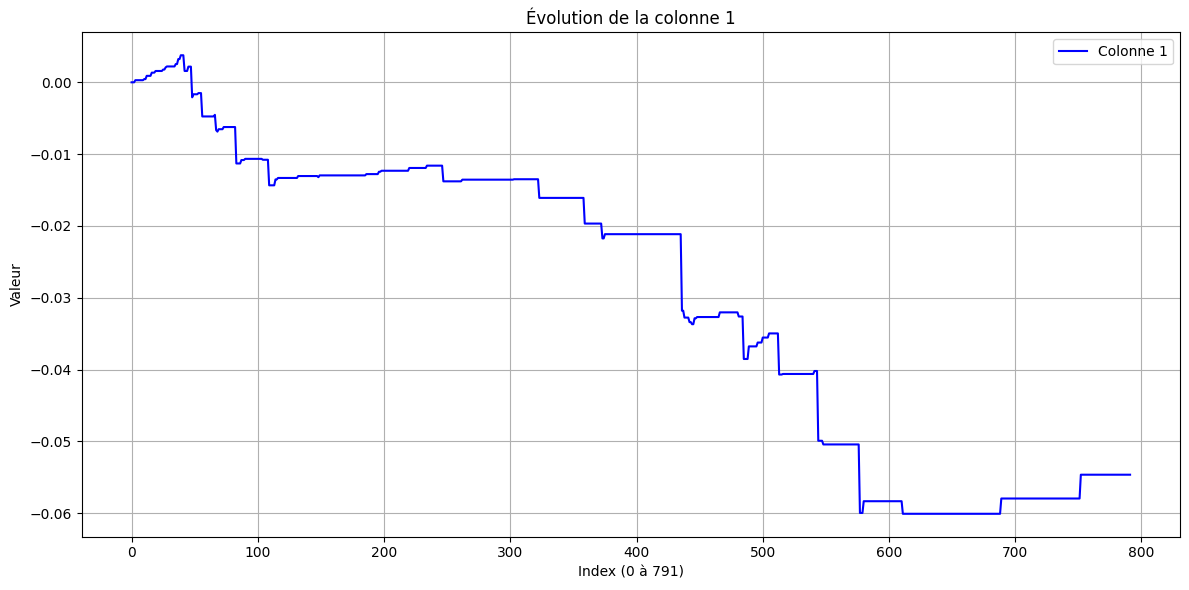

In [51]:
plt.figure(figsize=(12, 6))

plt.plot(data[:, 0], label='Colonne 1', color='blue')

plt.xlabel('Index (0 à 791)')
plt.ylabel('Valeur')
plt.title('Évolution de la colonne 1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

100%|██████████| 792/792 [00:05<00:00, 149.75it/s]
/tmp/ipykernel_924/2932888238.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


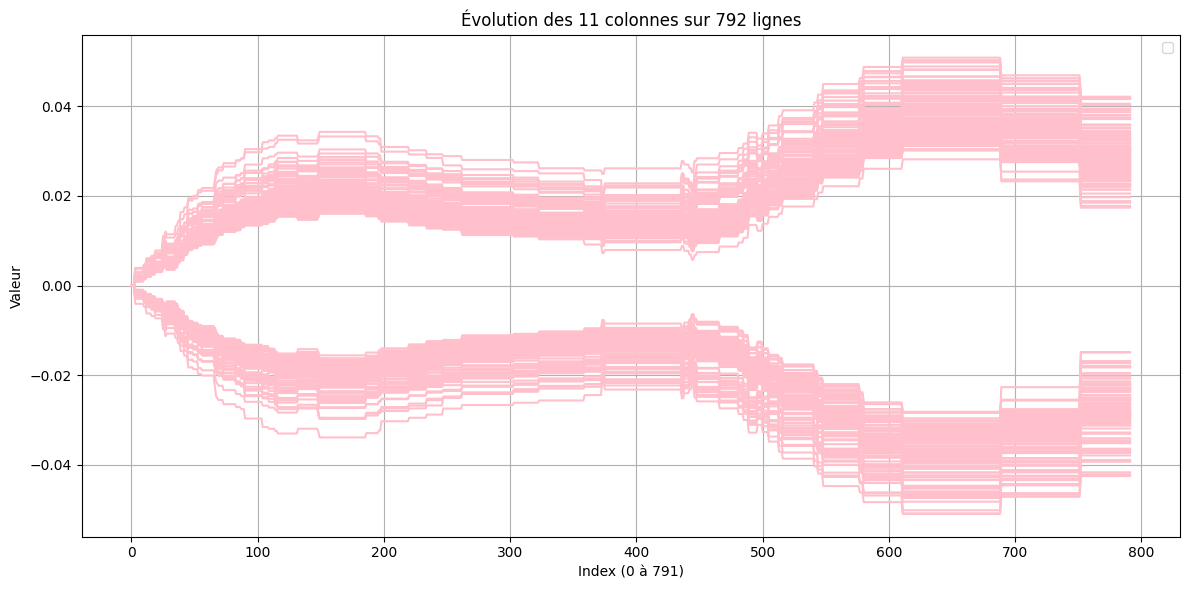

In [54]:
plt.figure(figsize=(12, 6))

for i in range(200):
    data = STS.computesurvshap(i)
    plt.plot(data[:, 6], color='pink')

plt.xlabel('Index (0 à 791)')
plt.ylabel('Valeur')
plt.title('Évolution des 11 colonnes sur 792 lignes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
X_0test = X_test[X_test.iloc[:, 6] == 0]
X_1test = X_test[X_test.iloc[:, 6] == 1]
X_0test

,age,sex,smoking,cholesterol,blood_pressure,diabetes,exercise,alcohol,weight,height
411,38.753579,1,0,200.957389,91.752747,1,0,1,47.505675,170.645060
811,45.602689,1,0,210.564185,135.107000,1,0,1,66.440259,173.240364
76,50.870471,0,1,239.674436,103.465618,1,0,1,68.296142,192.020139
636,58.231706,0,1,188.530463,126.387655,0,0,1,67.861248,179.126203
899,41.830643,0,0,215.807798,107.241971,0,0,0,64.001786,180.306598
...,...,...,...,...,...,...,...,...,...,...
199,38.570297,0,1,225.654271,105.599306,0,0,1,79.736222,163.882404
408,51.202956,1,1,209.485308,96.974396,1,0,0,74.316316,168.283263
332,50.758046,1,1,71.883317,135.730607,0,0,1,76.963229,166.532284
208,55.150477,1,1,217.572410,105.721223,1,0,0,75.496832,173.374821


100%|██████████| 792/792 [00:05<00:00, 155.56it/s]


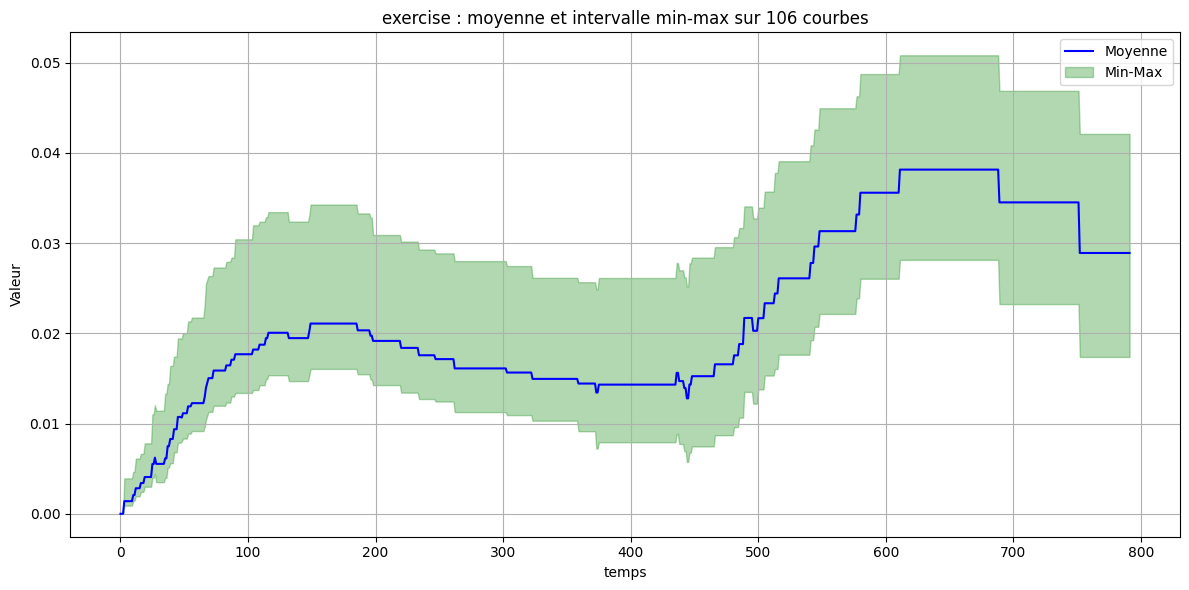

In [57]:
STS0=fstp.SurvTreeSHAPexplainer(rsf, X_0test)

all_curves = []

for i in range(105):
    data = STS0.computesurvshap(i)  # shape (792, 11)
    all_curves.append(data[:, 6])  # on ne garde que la première colonne


all_curves = np.array(all_curves)

# Calculer moyenne, min et max sur l'axe des courbes (i.e. sur les 200)
mean_curve = np.mean(all_curves, axis=0)
min_curve = np.min(all_curves, axis=0)
max_curve = np.max(all_curves, axis=0)

# Tracer
x = np.arange(all_curves.shape[1])  # de 0 à 791

plt.figure(figsize=(12, 6))
plt.plot(x, mean_curve, label='Moyenne', color='blue')
plt.fill_between(x, min_curve, max_curve, color='green', alpha=0.3, label='Min-Max')

plt.xlabel('temps')
plt.ylabel('Valeur')
plt.title('exercise : moyenne et intervalle min-max sur 106 courbes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

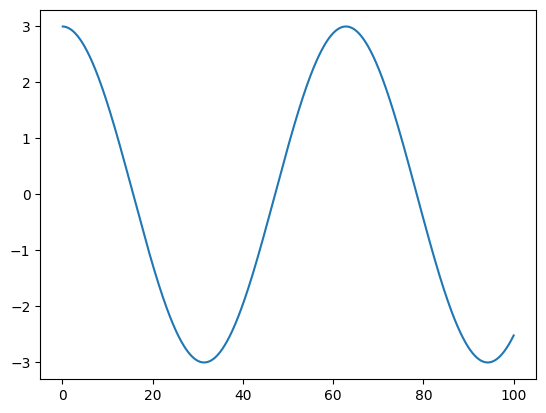

In [58]:
plt.plot(t_grid, beta_exercise_t)
plt.show()

100%|██████████| 792/792 [00:05<00:00, 151.04it/s]


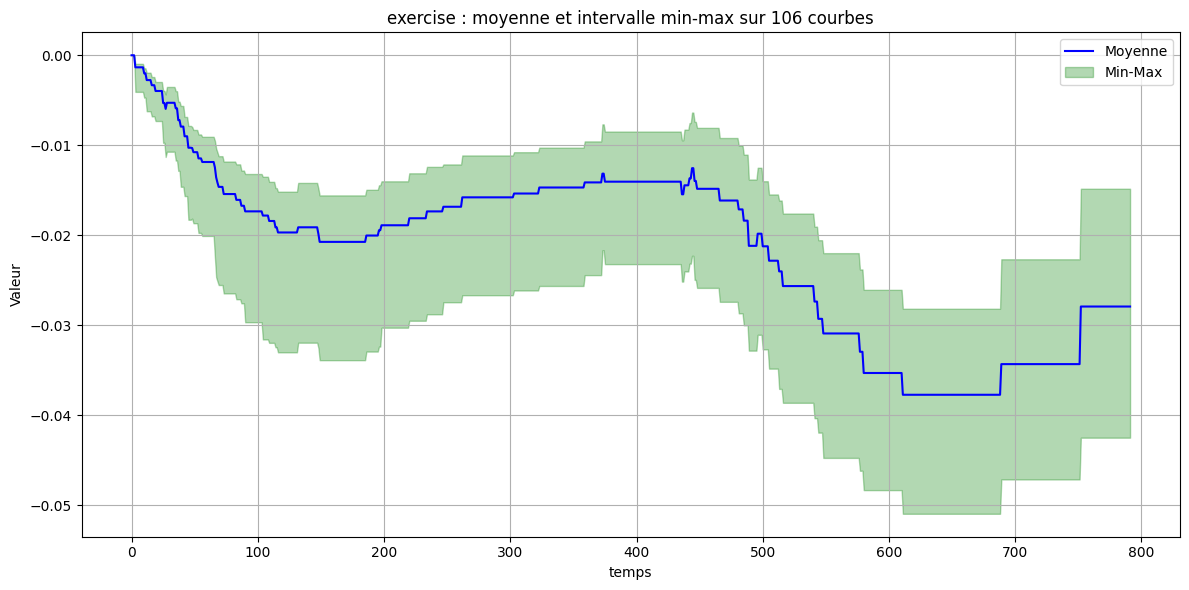

In [63]:
STS1=fstp.SurvTreeSHAPexplainer(rsf, X_1test)

all_curves = []

for i in range(len(X_1test)):
    data = STS1.computesurvshap(i)  
    all_curves.append(data[:, 6])  


all_curves = np.array(all_curves)

# Calculer moyenne, min et max sur l'axe des courbes (i.e. sur les 200)
mean_curve = np.mean(all_curves, axis=0)
min_curve = np.min(all_curves, axis=0)
max_curve = np.max(all_curves, axis=0)

# Tracer
x = np.arange(all_curves.shape[1])  

plt.figure(figsize=(12, 6))
plt.plot(x, mean_curve, label='Moyenne', color='blue')
plt.fill_between(x, min_curve, max_curve, color='green', alpha=0.3, label='Min-Max')

plt.xlabel('temps')
plt.ylabel('Valeur')
plt.title('exercise : moyenne et intervalle min-max sur 106 courbes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()